**Table of contents**<a id='toc0_'></a>    
- [N2 Excited State Data](#toc1_)    
- [NH3 Excited States](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[N2 Excited State Data](#toc0_)



just use pandoc style citations [@haupt2022; @laughlinTheory2000] and worry about matching citations when building in LaTeX (use pandoc to convert these)


In [237]:
from IPython.display import Markdown, display
import pandas as pd

display_csv = lambda f: display(Markdown(pd.read_csv(f,comment="#").to_markdown(index=False)))
display_md = lambda f: display(Markdown(open(f).read()))

In [238]:
import pandas as pd

from uncertainties import unumpy
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.core import UFloat
from math import isnan

def format_ufloat(x):
    if isinstance(x, type(ufloat(1, 1))):
        return f"{x:+.1uS}"  # Uses the shorthand format
    return x

def col2ufloat(col):
    return [ufloat_fromstr("nan") if pd.isna(x) else ufloat_fromstr(x) for x in col]

def display_formatted(df):
    # Create a copy to avoid modifying original
    display_df = df.copy()

    # Format ufloat columns
    for col in df.columns:
        if isinstance(df[col].iloc[0], UFloat):
            display_df[col] = df[col].apply(lambda x: f"{x:+.1uS}")

    display(display_df)

def get_state_values(filename):
    # read in data
    df = pd.read_csv(filename, comment='#', skipinitialspace=True)
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
    df.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too

    # handle NaNs as ufloats as well
    df["avdz"] = col2ufloat(df["avdz"])
    df["avtz"] = col2ufloat(df["avtz"])

    if "avqz" in df.columns: df["avqz"] = col2ufloat(df["avqz"])

    # display_formatted(df)

    # Get gs values as a series
    gs_values = df[df['state'] == 'gs'].iloc[0]
    # display(gs_values)

    # Create new dataframe excluding gs
    diff_df = df[df['state'] != 'gs'].reset_index(drop=True).copy()

    cols_to_diff = df.columns[1:]  # All columns except first
    for col in cols_to_diff:
        # display(diff_df[col])
        # display(gs_values[col])
        diff_df[col] = diff_df[col] - gs_values[col]
    for col in diff_df.columns[1:]:
        diff_df[col] *= 1000
    # display_formatted(diff_df)

    return df, diff_df
    # type(df["avdz"][1])

In [239]:
df = pd.read_csv("N2_casci_states.csv", comment='#', skipinitialspace=True)

display(df)

,state,avdz,avtz,avqz
0,gs,-109.4869509(85),-109.535373(13),-109.5425809(75)
1,1Pig,-109.145095(39),-109.195987(78),-109.203377(28)
2,1Sigu-,-109.120941(61),-109.174886(16),-109.181163(48)
3,1Delu,-109.107147(35),-109.160064(21),-109.167437(26)
4,3Sigu+,-109.201530(12),-109.250450(12),-109.258386(12)
5,3Pig,-109.192064(10),-109.2392879(69),-109.247170(20)
6,3Delu,-109.156060(8),-109.2080763(57),-109.2140954(86)


In [240]:
df_casscf, dfdiff_casscf = get_state_values("N2_casscf_states.csv")
df_sacasscf, dfdiff_sacasscf = get_state_values("N2_sacasscf_states.csv")
df_casci, dfdiff_casci = get_state_values("N2_casci_states.csv")

In [241]:
df_exp = pd.read_csv("N2_benchmark.csv", comment='#', skipinitialspace=True)
df_exp = df_exp.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_exp.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_exp["exp1"] *= 37
df_exp["exp2"] *= 37
df_exp["theory"] *= 37
# df.to_csv("N2_benchmark_converted.csv", index=False)

In [242]:
# seem to struggle with singlets but not triplets
print("N2 Loos")
# display_csv("N2_loos.csv")
df_loos = pd.read_csv("N2_loos.csv", comment='#', skipinitialspace=True)
df_loos = df_loos.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_loos.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
display_formatted(df_loos)

print("N2 Exp")
display_formatted(df_exp)

print("N2 SA-CASSCF")
display_formatted(dfdiff_sacasscf)

print("N2 CASSCF")
display_formatted(dfdiff_casscf)

print("N2 CASCI")
display_formatted(dfdiff_casci)


N2 Loos


,state,avdz,avtz,avqz
0,1Pig,345.8,343.2,343.2
1,1Sigu-,369.3,363.1,364.6
2,1Delu,383.3,378.2,378.9
3,3Sigu+,283.0,283.0,284.4
4,3Pig,295.8,294.4,295.1
5,3Delu,329.3,326.0,326.3


N2 Exp


,state,exp1,exp2,theory
0,1Pig,344.47,344.47,342.99
1,1Sigu-,367.04,367.04,373.33
2,1Delu,379.99,379.99,389.98
3,3Sigu+,286.75,286.75,279.72
4,3Pig,297.48,297.48,297.85
5,3Delu,328.56,328.56,330.41


N2 SA-CASSCF


,state,avdz,avtz,avqz
0,1Pig,+343.38(3),+342.07(2),+342.3(2)
1,1Sigu-,+366.97(5),+367.54(2),+368.06(3)
2,1Delu,+380.12(6),+377.35(4),+377.34(6)
3,3Sigu+,+284.957(9),+285.89(2),+286.97(3)
4,3Pig,+296.355(6),+296.55(3),+296.99(3)
5,3Delu,+329.637(7),+327.28(2),+324.10(5)


N2 CASSCF


,state,avdz,avtz,avqz
0,1Pig,+340.729(3),+341.79(4),+342.47(3)
1,1Sigu-,+364.794(3),+361.90(2),+366.82(3)
2,1Delu,+377.565(3),+376.73(2),+376.57(4)
3,3Sigu+,+282.681(3),+284.09(1),+286.49(3)
4,3Pig,+292.791(4),+294.63(1),+295.29(3)
5,3Delu,+325.839(3),+325.65(1),+335.63(4)


N2 CASCI


,state,avdz,avtz,avqz
0,1Pig,+341.86(4),+339.39(8),+339.20(3)
1,1Sigu-,+366.01(6),+360.49(2),+361.42(5)
2,1Delu,+379.80(4),+375.31(2),+375.14(3)
3,3Sigu+,+285.42(1),+284.92(2),+284.19(1)
4,3Pig,+294.89(1),+296.09(1),+295.41(2)
5,3Delu,+330.89(1),+327.30(1),+328.49(1)


In [243]:
dfdiff_casscf.to_latex("N2_casscf_diff.tex", index=False)
dfdiff_casci.to_latex("N2_casci_diff.tex", index=False)

In [244]:
dfdiff_sacasscf_nominal

,state,avdz,avtz,avqz
0,1Pig,-1.0928,-2.397,-2.196
1,1Sigu-,-0.0748,0.497,1.024
2,1Delu,0.1302,-2.643,-2.652
3,3Sigu+,-1.7927,-0.864,0.222
4,3Pig,-1.1253,-0.927,-0.494
5,3Delu,1.0772,-1.283,-4.463


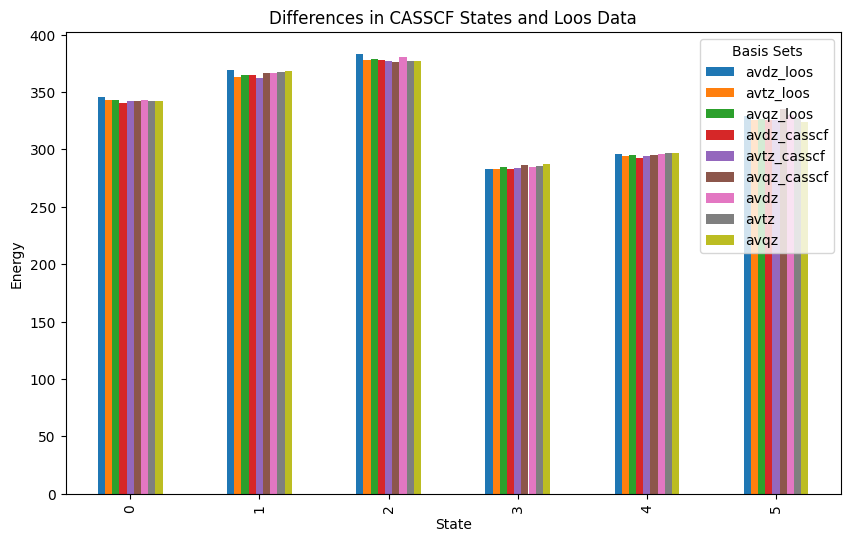

In [245]:
import matplotlib.pyplot as plt
from uncertainties import unumpy

# Extract nominal values from dfdiff_casscf
dfdiff_casscf_nominal = dfdiff_casscf.copy()
for col in dfdiff_casscf.columns[1:]:
    dfdiff_casscf_nominal[col] = unumpy.nominal_values(dfdiff_casscf[col])

# Extract nominal values from df_loos
df_loos_nominal = df_loos.copy()
for col in df_loos.columns[1:]:
    df_loos_nominal[col] = unumpy.nominal_values(df_loos[col])


# Extract nominal values from dfdiff_casscf
dfdiff_sacasscf_nominal = dfdiff_sacasscf.copy()
for col in dfdiff_sacasscf.columns[1:]:
    dfdiff_sacasscf_nominal[col] = unumpy.nominal_values(dfdiff_sacasscf[col])

# Combine the dataframes for plotting
# combined_df_tmp = dfdiff_casscf_nominal.set_index('state').join(df_loos_nominal.set_index('state'), lsuffix='_xtc', rsuffix='_loos')
# combined_df = dfdiff_sacasscf_nominal.set_index('state').join(combined_df_tmp.set_index('state'), lsuffix='_sacasscf', rsuffix='')

combined_df = df_loos_nominal.merge(dfdiff_casscf_nominal, on="state", suffixes=("_loos", "_casscf")).merge(dfdiff_sacasscf_nominal, on="state", suffixes=("", "_sacasscf"))

# Plot the nominal values
combined_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Energy')
plt.title('Differences in CASSCF States and Loos Data')
plt.legend(title='Basis Sets')
plt.show()

0    342.470+/-0.026
1    366.820+/-0.030
2      376.57+/-0.04
3    286.486+/-0.026
4    295.293+/-0.034
5    335.631+/-0.035
Name: avqz, dtype: object
0    344.47
1    367.04
2    379.99
3    286.75
4    297.48
5    328.56
Name: exp1, dtype: float64
0   -2.000
1   -0.220
2   -3.415
3   -0.264
4   -2.187
5    7.071
Name: avqz, dtype: float64


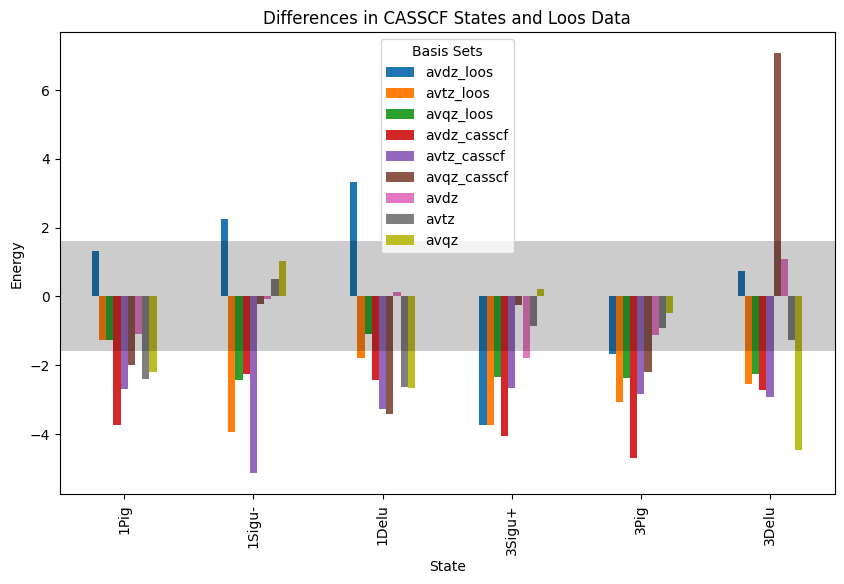

In [246]:
import matplotlib.pyplot as plt
from uncertainties import unumpy

# Extract nominal values from dfdiff_casscf
dfdiff_casscf_nominal = dfdiff_casscf.copy()
for col in dfdiff_casscf.columns[1:]:
    dfdiff_casscf_nominal[col] = unumpy.nominal_values(dfdiff_casscf[col]) - df_exp["exp1"]

# Extract nominal values from df_loos
df_loos_nominal = df_loos.copy()
for col in df_loos.columns[1:]:
    df_loos_nominal[col] = unumpy.nominal_values(df_loos[col]) - df_exp["exp1"]

# display_formatted(df_loos_nominal)
print(dfdiff_casscf["avqz"])
print(df_exp["exp1"])
print(dfdiff_casscf_nominal["avqz"])


# Extract nominal values from dfdiff_casscf
dfdiff_sacasscf_nominal = dfdiff_sacasscf.copy()
for col in dfdiff_sacasscf.columns[1:]:
    dfdiff_sacasscf_nominal[col] = unumpy.nominal_values(dfdiff_sacasscf[col]) - df_exp["exp1"]

dfdiff_casci_nominal = dfdiff_casci.copy()
for col in dfdiff_casci.columns[1:]:
    dfdiff_casci_nominal[col] = unumpy.nominal_values(dfdiff_casci[col]) - df_exp["exp1"]

# Combine the dataframes for plotting
combined_df = df_loos_nominal.merge(dfdiff_casscf_nominal, on="state", suffixes=("_loos", "_casscf")).merge(dfdiff_sacasscf_nominal, on="state", suffixes=("", "_sacasscf"))

combined_df.set_index("state", inplace=True)

# Plot the nominal values
combined_df.plot(kind='bar', figsize=(10, 6))
xlim = plt.xlim()
ylim = plt.ylim()
plt.axhspan(-1.6, 1.6, facecolor='k', alpha=0.2)
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel('State')
plt.ylabel('Energy')
plt.title('Differences in CASSCF States and Loos Data')
plt.legend(title='Basis Sets')
plt.show()

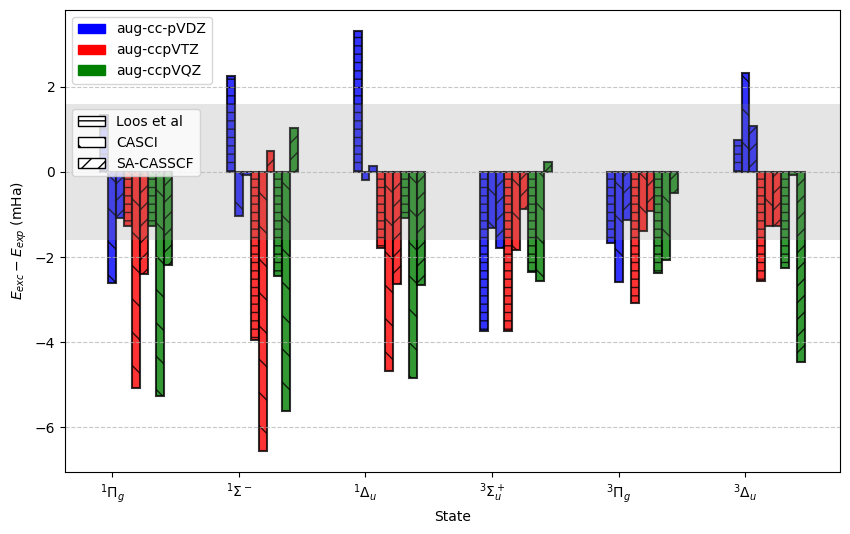

In [256]:
import numpy as np
import matplotlib.patches as mpatches
# Dictionary of DataFrames with styles
# dfs = {
#     "Loos et al": (df_loos_nominal, "--", 0.8),          # Opposite diagonal hatch
#     # "CASSCF": (dfdiff_casscf_nominal, "\\", 0.8),   # Diagonal hatch
#     "CASCI": (dfdiff_casci_nominal, "\\", 0.8),   # Diagonal hatch
#     "SA-CASSCF": (dfdiff_sacasscf_nominal, "//", 0.8) # Vertical hatch
# }


dfs = {
    "Loos et al": (df_loos_nominal, "--", 0.8),          # Opposite diagonal hatch
    # "CASSCF": (dfdiff_casscf_nominal, "\\", 0.8),   # Diagonal hatch
    "CASCI": (dfdiff_casci_nominal, "\\", 0.8),   # Diagonal hatch
    "SA-CASSCF": (dfdiff_sacasscf_nominal, "//", 0.8) # Vertical hatch
}

# Define a color map for each column (same across DataFrames)
colors = {"avdz": "blue", "avtz": "red", "avqz": "green"}

basis_names = {"avdz": "aug-cc-pVDZ", "avtz": "aug-ccpVTZ", "avqz": "aug-ccpVQZ"}

# Example dictionary mapping state numbers to names
state_labels_dict = {
    "1Pig": r"${}^1\Pi_g$",
    "1Sigu-": r"${}^1\Sigma^-$",
    "1Delu": r"${}^1\Delta_u$",
    "3Sigu+": r"${}^3\Sigma_u^+$",
    "3Pig": r"${}^3\Pi_g$",
    "3Delu": r"${}^3\Delta_u$"
}

# Bar width settings
n_dfs = len(dfs)  # Number of DataFrames
bar_width = 0.25
x = np.arange(len(dfdiff_casscf_nominal["state"]))  # x locations for groups

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles
color_patches = []  # For colors (columns)
style_patches = []  # For hatches (DataFrames)

# Plot each DataFrame with different styles
for i, (label, (df, hatch, alpha)) in enumerate(dfs.items()):
    for j, col in enumerate(df.columns):
        if col != "state":  # Skip the key column
            bars = ax.bar(
                x + (j * n_dfs + i) * bar_width / len(df.columns),  # Adjust x position for grouping
                df[col],
                width=bar_width / len(df.columns),  # Adjust bar width for grouped layout
                color=colors[col], alpha=alpha,  # Set transparency
                hatch=hatch, edgecolor="black", linewidth=1.5  # Strong outlines
            )
            # Collect only one handle per column for color legend
            if i == 0:
                color_patches.append(mpatches.Patch(color=colors[col], label=f"{basis_names[col]}"))

    # Collect only one handle per DataFrame for hatch legend
    style_patches.append(mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatch, label=f"{label}"))

# Shade region between y=-1 and y=1
ax.axhspan(-1.6, 1.6, facecolor='gray', alpha=0.2)

# Customize labels
ax.set_xlabel("State")
ax.set_ylabel(r"$E_{exc}-E_{exp}$ (mHa)")
# ax.set_title("Comparison of CASSCF, LOOS, and SACASSCF")
xtick_positions = x + (n_dfs - 1) * bar_width / 2
ax.set_xticks(xtick_positions)
ax.set_xticklabels(dfdiff_casscf_nominal["state"])
ax.grid(axis="y", linestyle="--", alpha=0.7)

xtick_labels = [state_labels_dict[state] for state in dfdiff_casscf_nominal["state"]]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

# # Create two separate legends
# legend1 = ax.legend(handles=color_patches, title="Columns (Colors)", loc="upper left", bbox_to_anchor=(1, 1))
# legend2 = ax.legend(handles=style_patches, title="Methods (Styles)", loc="upper left", bbox_to_anchor=(1, 0.8))
legend1 = ax.legend(handles=color_patches, loc="upper left", bbox_to_anchor=(0, 1))
legend2 = ax.legend(handles=style_patches, loc="upper left", bbox_to_anchor=(0, 0.8))

# Add both legends to the plot
ax.add_artist(legend1)  # Keep the first legend when adding the second

plt.savefig("n2_exc.pdf")
# Show plot
plt.show()

# # bar width settings
# n_dfs = len(dfs)  # Number of DataFrames
# bar_width = 0.25
# x = np.arange(len(dfdiff_casscf_nominal["state"]))  # x locations for groups

# # Create figure
# plt.figure(figsize=(10, 6))

# # Plot each DataFrame with different hatch styles
# for i, (label, (df, hatch, alpha)) in enumerate(dfs.items()):
#     for j, col in enumerate(df.columns):
#         if col != "state":  # Skip the key column
#             plt.bar(
#                 x + (j * n_dfs + i) * bar_width / len(df.columns),  # Adjust x position for grouping
#                 df[col],
#                 width=bar_width / len(df.columns),  # Adjust bar width for grouped layout
#                 color=colors[col], alpha=alpha,
#                 label=f"{basis_names[col]}" if i == 0 else "",  # Avoid duplicate legend entries
#                 hatch=hatch, edgecolor="black"
#             )

# # Shade region between y=-1 and y=1
# plt.axhspan(-1.6, 1.6, facecolor='gray', alpha=0.2)

# # Customize labels
# plt.xlabel("State")
# plt.ylabel("Values")
# plt.title("Comparison of CASSCF, LOOS, and SACASSCF")
# plt.xticks(x + (n_dfs - 1) * bar_width / 2, dfdiff_casscf_nominal["state"])  # Center x-ticks
# plt.legend()
# # plt.grid(axis="y", linestyle="--", alpha=0.7)

# # Show plot
# plt.show()


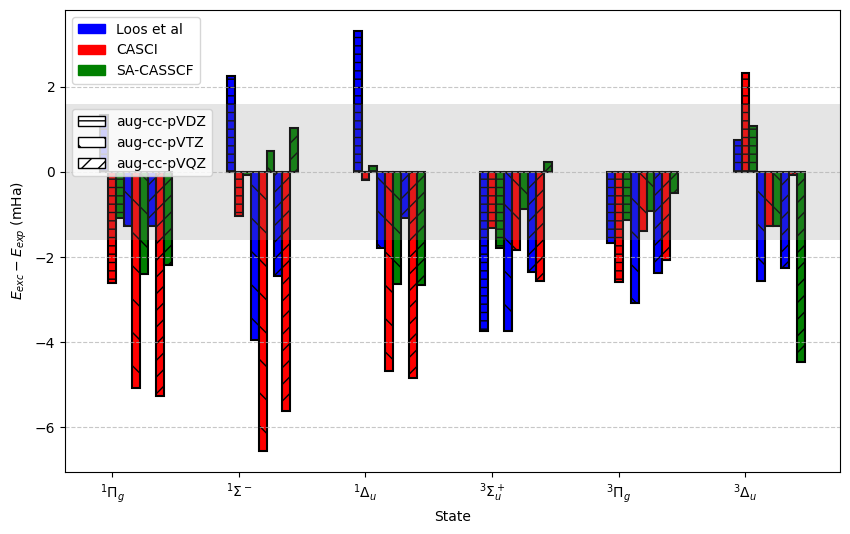

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define colors for methods
method_colors = {
    "Loos et al": "blue",
    "CASCI": "red",
    "SA-CASSCF": "green"
}

# Define hatch patterns for basis sets
basis_hatches = {
    "avdz": "--",  # Opposite diagonal
    "avtz": "\\",  # Diagonal
    "avqz": "//"   # Vertical
}

# Dictionary of DataFrames with styles (now using colors for methods)
dfs = {
    "Loos et al": (df_loos_nominal, "blue"),
    "CASCI": (dfdiff_casci_nominal, "red"),
    "SA-CASSCF": (dfdiff_sacasscf_nominal, "green")
}

# Mapping basis set names
basis_names = {"avdz": "aug-cc-pVDZ", "avtz": "aug-cc-pVTZ", "avqz": "aug-cc-pVQZ"}

# Example dictionary mapping states to formatted names
state_labels_dict = {
    "1Pig": r"${}^1\Pi_g$",
    "1Sigu-": r"${}^1\Sigma^-$",
    "1Delu": r"${}^1\Delta_u$",
    "3Sigu+": r"${}^3\Sigma_u^+$",
    "3Pig": r"${}^3\Pi_g$",
    "3Delu": r"${}^3\Delta_u$"
}

# Bar width settings
n_dfs = len(dfs)  # Number of methods
bar_width = 0.25
x = np.arange(len(dfdiff_casci_nominal["state"]))  # x locations for groups

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Store legend handles
method_patches = [mpatches.Patch(color=color, label=method) for method, color in method_colors.items()]
basis_patches = [mpatches.Patch(facecolor="white", edgecolor="black", hatch=hatch, label=basis_names[basis])
                 for basis, hatch in basis_hatches.items()]

# Plot each DataFrame with swapped colors and hatches
for i, (method, (df, color)) in enumerate(dfs.items()):
    for j, col in enumerate(df.columns):
        if col != "state":  # Skip key column
            ax.bar(
                x + (j * n_dfs + i) * bar_width / len(df.columns),  # Adjust x position
                df[col],
                width=bar_width / len(df.columns),  # Adjust bar width
                color=color,  # Method-based color
                hatch=basis_hatches[col], edgecolor="black", linewidth=1.5  # Basis-based hatch
            )

# Shade region between y=-1.6 and y=1.6
ax.axhspan(-1.6, 1.6, facecolor='gray', alpha=0.2)

# Customize labels
ax.set_xlabel("State")
ax.set_ylabel(r"$E_{exc}-E_{exp}$ (mHa)")

# Update x-ticks
xtick_positions = x + (n_dfs - 1) * bar_width / 2
xtick_labels = [state_labels_dict[state] for state in dfdiff_casci_nominal["state"]]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Create two separate legends
legend1 = ax.legend(handles=method_patches, loc="upper left", bbox_to_anchor=(0, 1))
legend2 = ax.legend(handles=basis_patches, loc="upper left", bbox_to_anchor=(0, 0.8))

# Add first legend manually before adding the second
ax.add_artist(legend1)

# Save and show plot
plt.savefig("n2_exc.pdf")
plt.show()


# <a id='toc2_'></a>[NH3 Excited States](#toc0_)

In [248]:
df_exp = pd.read_csv("NH3_benchmark.csv", comment='#', skipinitialspace=True)
df_exp = df_exp.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_exp.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_exp["exp1"] *= 37
df_exp["exp2"] *= 37
df_exp["theory"] *= 37
display_formatted(df_exp)
df_exp.to_csv("NH3_benchmark_converted.csv", index=False)

,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN


In [249]:
df_loos = pd.read_csv("NH3_loos.csv", comment='#', skipinitialspace=True)
df_loos = df_loos.map(lambda x: x.strip() if isinstance(x, str) else x) # strip data
df_loos.rename(columns=lambda x: x.strip(), inplace=True) # strip headers too
df_loos["avdz"]
df_loos["avdz"] *= 37
df_loos["avtz"] *= 37
df_loos["avqz"] *= 37
display_formatted(df_exp)
df_loos.to_csv("NH3_loos_converted.csv", index=False)

,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN


In [250]:
df_casscf, dfdiff_casscf = get_state_values("NH3_casscf_states.csv")
df_casci, dfdiff_casci = get_state_values("NH3_casci_states.csv")

In [251]:
# seem to struggle with singlets but not triplets, making me feel there is something wrong
# with the spin penalty
print("NH3 Loos")
display_formatted(df_loos)

print("NH3 CASSCF")
display_formatted(dfdiff_casscf)

print("NH3 CASCI")
display_formatted(dfdiff_casci)

print("NH3 Exp")
display_formatted(df_exp)

NH3 Loos


,state,avdz,avtz,avqz
0,1E,298.96,301.92,304.14
1,3A2,229.03,233.47,234.95


NH3 CASSCF


,state,avdz,avtz,avqz
0,1E,+295.7(1),+304.36(2),+nan(1)e+03
1,3A2,+233.704(7),+234.31(1),+nan(1)e+03


NH3 CASCI


,state,avdz,avtz,avqz
0,1E,+304.18(2),+306.31(2),+nan(1)e+03
1,3A2,+232.98(1),+235.68(1),+nan(1)e+03


NH3 Exp


,state,exp1,exp2,theory
0,1E,292.30,293.41,296.74
1,3A2,222.74,NaN,NaN
